In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('train.csv')

In [210]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
data.drop('PassengerId', axis=1, inplace=True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Logistic Regression

In [212]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
results = {}

In [213]:
y,x = dmatrices(formula, data=data, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Dec 2019   Pseudo R-squ.:                  0.3414
Time:                        22:47:25   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
Age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
SibSp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

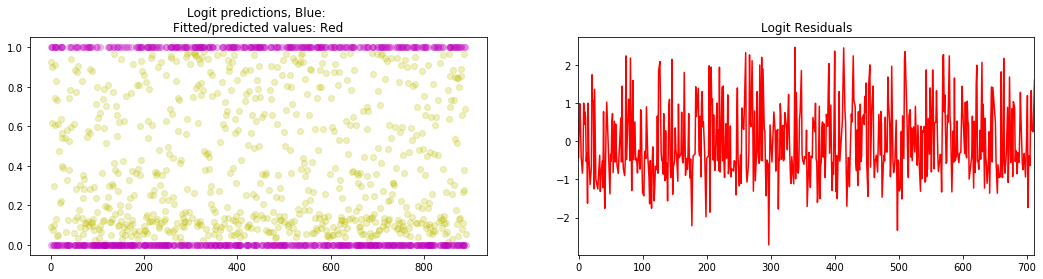

In [214]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121)
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'yo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122)
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

In [215]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221)
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222)
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223)
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224)
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

Error in callback <function flush_figures at 0x11aa3c378> (for post_execute):


KeyboardInterrupt: 

We are going to attempt to do Linear Regression on this dataset

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

data["Age"] = data["Age"].fillna(data["Age"].median())

In [235]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [236]:
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [237]:
data["Embarked"] = data["Embarked"].fillna("S")

In [238]:
data["Embarked"].unique()

array([0, 1, 2])

In [239]:
data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [240]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [241]:
alg = LinearRegression()
kf = KFold(n_splits=3)

In [242]:
kf.get_n_splits(data.shape[0])

3

In [243]:
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [334]:
predictions = []
for train, test in kf.split(data):
    train_predictors = (data[predictors].iloc[train, :])  # the features for training (x1, x2...xn)
    train_target = data["Survived"].iloc[train]  # the predictive target (y)
    alg.fit(train_predictors, train_target)  # finding the best fit for the target (using what? Gradient Descent?)
    test_predictions = alg.predict(data[predictors].iloc[test, :])  # predict based on the best fit produced by alg.fit
    predictions.append(test_predictions)

In [335]:
predictions = np.concatenate(predictions)

In [336]:
predictions

array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
        5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
        5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
        1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
        1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
        2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
        5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
        6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
        6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
        1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
        4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
        7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
        6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
        9.02668258e-01,  

In [337]:
list_nums = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in list_nums:
    print(i)
    predictions[predictions > i] = 1
    predictions[predictions <= i] = 0
    accuracy = np.count_nonzero(data["Survived"] == predictions)/data["Survived"].count()
    print(accuracy)

# predictions[predictions > 0.3] = 1
# predictions[predictions <= 0.3] = 0
# accuracy = np.count_nonzero(data["Survived"] == predictions)/data["Survived"].count()
# print(accuracy)

0.1
0.5252525252525253
0.2
0.5252525252525253
0.3
0.5252525252525253
0.4
0.5252525252525253
0.5
0.5252525252525253
0.6
0.5252525252525253
0.7
0.5252525252525253
0.8
0.5252525252525253
0.9
0.5252525252525253


In [328]:
# Dividing the number of right predictions by the total count
#accuracy = np.count_nonzero(data["Survived"] == predictions)/data["Survived"].count()

In [329]:
#accuracy